In [107]:
from importlib import reload
import qubic.job_manager as jm
import qubic.state_disc as sd
import chipcalibration.rabi_experiments as rabi
import chipcalibration.ramsey as gordon
from matplotlib import pyplot as plt
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as cfg
import qubic.rpc_client as rc
import numpy as np
import logging
import chipcalibration.graph as graph
import chipcalibration.repeated_xgates as rx
import networkx as nx
reload(rx)
import logging
logging.getLogger().setLevel(logging.INFO)

In [132]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5,
                            'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname, qchip_file='qubitcfg.json')
gmm_manager = sd.GMMManager('../submodules/qchip/X4Y2/Q0123_gmm_manager.pkl')

runner = rc.CircuitRunnerClient(ip='192.168.1.247')
job_manager = jm.JobManager(fpga_config, channel_config, runner, qchip, gmm_manager=gmm_manager)

In [133]:
qubits = ['Q1', 'Q2', 'Q3']

In [134]:
cal_graph = graph.CalibrationGraph()

In [137]:
for qubit in qubits:
    cal_graph.add_calibration_step('{}_stack_0'.format(qubit), 
                                   rx.XGateRepetition([qubit], 0.3, 30, 0), 
                                   [qubit], shots_per_circuit=1000)
    cal_graph.add_calibration_step('{}_stack_1'.format(qubit), 
                                   rx.XGateRepetition([qubit], 0.05, 25, 5), 
                                   [qubit], predecessor_nodes=['{}_stack_0'.format(qubit)], shots_per_circuit=1000)
    cal_graph.add_calibration_step('{}_stack_2'.format(qubit), 
                                   rx.XGateRepetition([qubit], 0.025, 25, 10), 
                                   [qubit], predecessor_nodes=['{}_stack_1'.format(qubit)], shots_per_circuit=1000)
    cal_graph.add_calibration_step('{}_stack_3'.format(qubit), 
                                   rx.XGateRepetition([qubit], 0.01, 25, 40), 
                                   [qubit], predecessor_nodes=['{}_stack_2'.format(qubit)], shots_per_circuit=1000)

INFO:chipcalibration.graph:starting calibration step Q1_stack_0
INFO:chipcalibration.repeated_xgates:finished Q1 repeatgate. results: {'opt_amplitude': 0.4707773287536898, 'quadratic_fit_params': array([-7.18392159,  6.76405483, -0.76162158]), 'fit_cov': array([[ 0.16508422, -0.1551761 ,  0.03529625],
       [-0.1551761 ,  0.14679507, -0.03361604],
       [ 0.03529625, -0.03361604,  0.00775917]])}


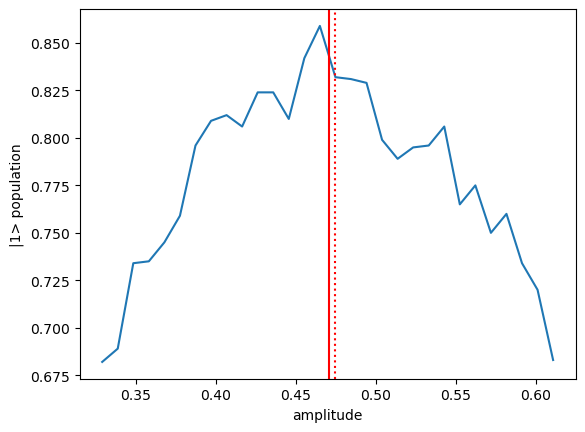

INFO:chipcalibration.graph:starting calibration step Q2_stack_0
INFO:chipcalibration.repeated_xgates:finished Q2 repeatgate. results: {'opt_amplitude': 0.38248314668727446, 'quadratic_fit_params': array([-13.51600194,  10.3392859 ,  -1.07381532]), 'fit_cov': array([[ 0.43482539, -0.33434444,  0.06220965],
       [-0.33434444,  0.25872635, -0.04846584],
       [ 0.06220965, -0.04846584,  0.00915091]])}


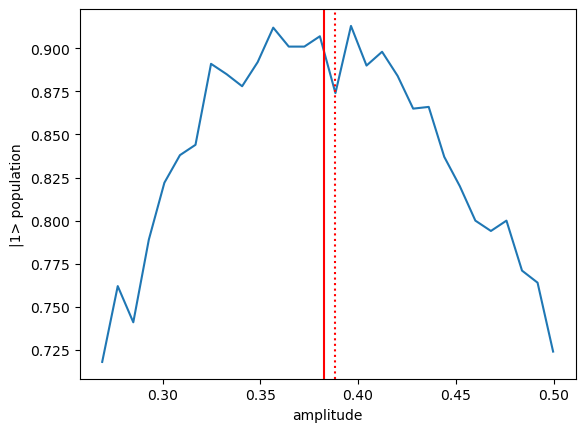

INFO:chipcalibration.graph:starting calibration step Q3_stack_0
INFO:chipcalibration.repeated_xgates:finished Q3 repeatgate. results: {'opt_amplitude': 0.1719158289951113, 'quadratic_fit_params': array([-57.69320529,  19.83675043,  -0.84129103]), 'fit_cov': array([[ 8.32637044e+00, -2.87556825e+00,  2.40312330e-01],
       [-2.87556825e+00,  9.99445173e-01, -8.40896934e-02],
       [ 2.40312330e-01, -8.40896934e-02,  7.13115885e-03]])}


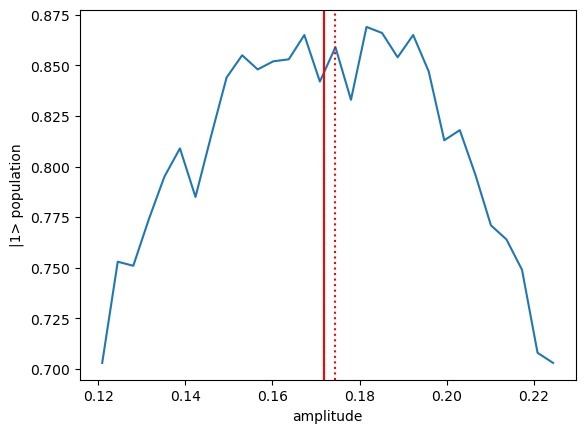

INFO:chipcalibration.graph:starting calibration step Q1_stack_1
INFO:chipcalibration.repeated_xgates:finished Q1 repeatgate. results: {'opt_amplitude': 0.4698913174525928, 'quadratic_fit_params': array([-895.38325977,  841.46563911, -196.8296043 ]), 'fit_cov': array([[ 433.75110794, -408.40037588,   96.04603244],
       [-408.40037588,  384.6003715 ,  -90.46511775],
       [  96.04603244,  -90.46511775,   21.28291667]])}


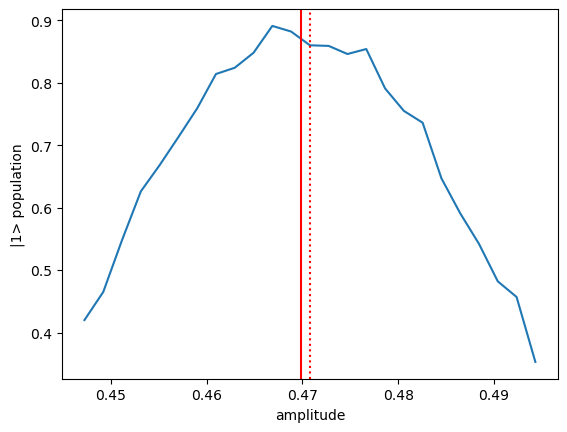

INFO:chipcalibration.graph:starting calibration step Q2_stack_1
INFO:chipcalibration.repeated_xgates:finished Q2 repeatgate. results: {'opt_amplitude': 0.3841402813334406, 'quadratic_fit_params': array([-1344.07170566,  1032.62416629,  -197.44166585]), 'fit_cov': array([[ 1366.65671607, -1045.44632241,   199.75230466],
       [-1045.44632241,   799.87489988,  -152.85874356],
       [  199.75230466,  -152.85874356,    29.21709553]])}


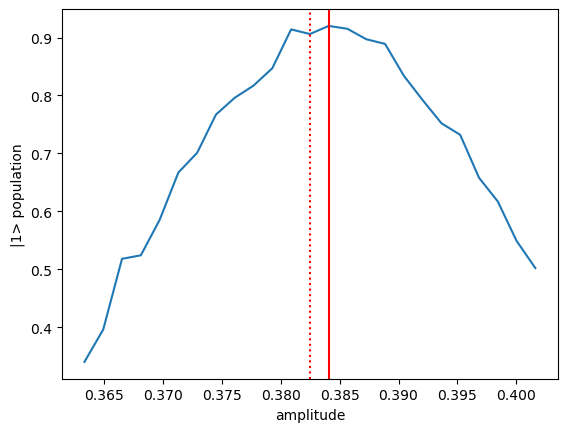

INFO:chipcalibration.graph:starting calibration step Q3_stack_1
INFO:chipcalibration.repeated_xgates:finished Q3 repeatgate. results: {'opt_amplitude': 0.17254300899463823, 'quadratic_fit_params': array([-6273.57780007,  2164.92398157,  -185.9181519 ]), 'fit_cov': array([[ 1.14819010e+04, -3.94784105e+03,  3.39041827e+02],
       [-3.94784105e+03,  1.35763664e+03, -1.16615245e+02],
       [ 3.39041827e+02, -1.16615245e+02,  1.00185679e+01]])}


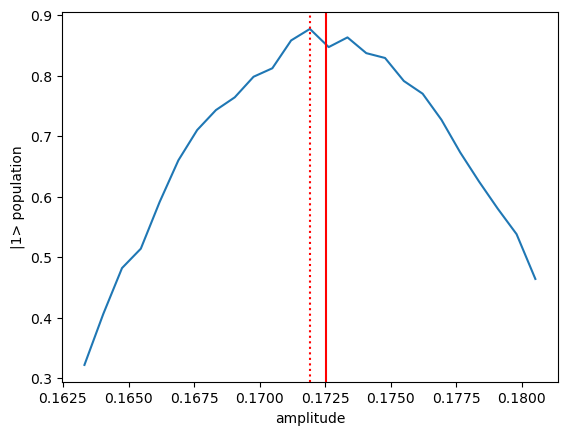

INFO:chipcalibration.graph:starting calibration step Q1_stack_2
INFO:chipcalibration.repeated_xgates:finished Q1 repeatgate. results: {'opt_amplitude': 0.46971598702444206, 'quadratic_fit_params': array([-3078.93066094,  2892.44590876,  -678.47075594]), 'fit_cov': array([[ 8536.91341998, -8022.84298779,  1884.50671192],
       [-8022.84298779,  7540.06722124, -1771.18583482],
       [ 1884.50671192, -1771.18583482,   416.07592121]])}


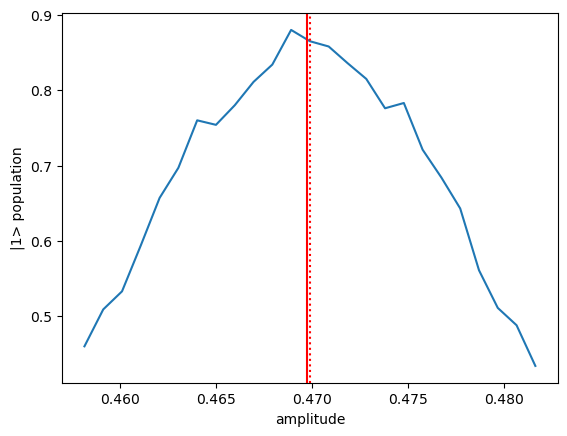

INFO:chipcalibration.graph:starting calibration step Q2_stack_2
INFO:chipcalibration.repeated_xgates:finished Q2 repeatgate. results: {'opt_amplitude': 0.384518514795144, 'quadratic_fit_params': array([-5006.27052048,  3850.0074104 ,  -739.30583906]), 'fit_cov': array([[10982.34612946, -8437.52306375,  1620.23048217],
       [-8437.52306375,  6482.67616782, -1244.90344848],
       [ 1620.23048217, -1244.90344848,   239.07631484]])}


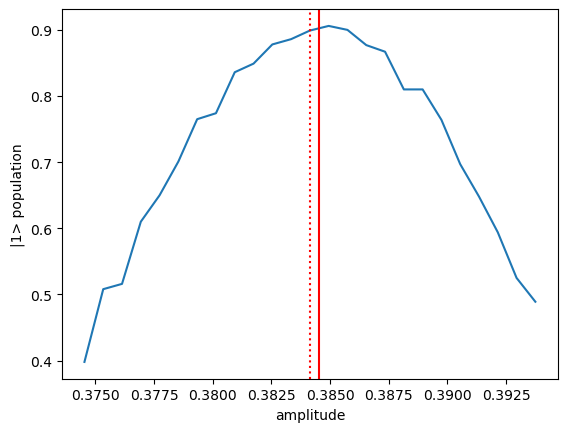

INFO:chipcalibration.graph:starting calibration step Q3_stack_2
INFO:chipcalibration.repeated_xgates:finished Q3 repeatgate. results: {'opt_amplitude': 0.17259468649317722, 'quadratic_fit_params': array([-23313.49737353,   8047.57154049,   -693.63141393]), 'fit_cov': array([[ 3.18990338e+05, -1.10079106e+05,  9.49454670e+03],
       [-1.10079106e+05,  3.79884666e+04, -3.27672975e+03],
       [ 9.49454670e+03, -3.27672975e+03,  2.82650022e+02]])}


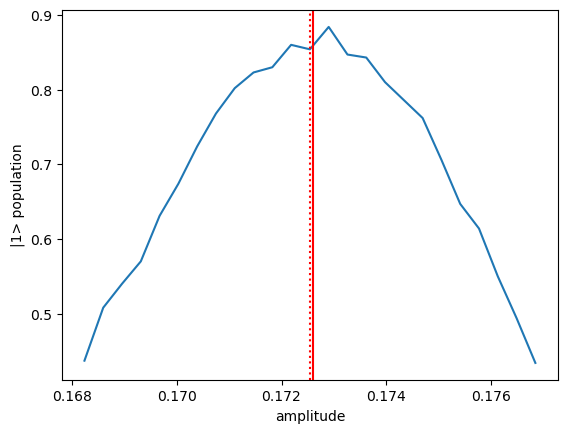

INFO:chipcalibration.graph:starting calibration step Q1_stack_3
INFO:chipcalibration.repeated_xgates:finished Q1 repeatgate. results: {'opt_amplitude': 0.4699900268877754, 'quadratic_fit_params': array([-33704.40521831,  31681.46862958,  -7444.18816207]), 'fit_cov': array([[ 2450973.16368739, -2302522.55751519,   540746.30022245],
       [-2302522.55751519,  2163078.85851189,  -508001.66695577],
       [  540746.30022245,  -508001.66695577,   119305.65912669]])}


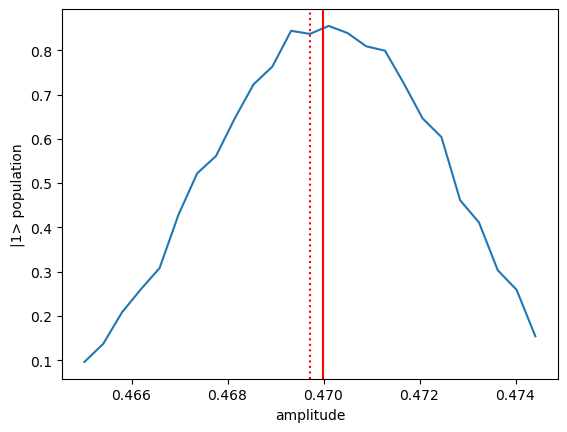

INFO:chipcalibration.graph:starting calibration step Q2_stack_3
INFO:chipcalibration.repeated_xgates:finished Q2 repeatgate. results: {'opt_amplitude': 0.38442952351328535, 'quadratic_fit_params': array([-53344.50225506,  41014.40316793,  -7882.73225463]), 'fit_cov': array([[ 4489741.02704333, -3452777.10304716,   663804.39020763],
       [-3452777.10304716,  2655332.53222086,  -510497.49503464],
       [  663804.39020763,  -510497.49503464,    98145.73612908]])}


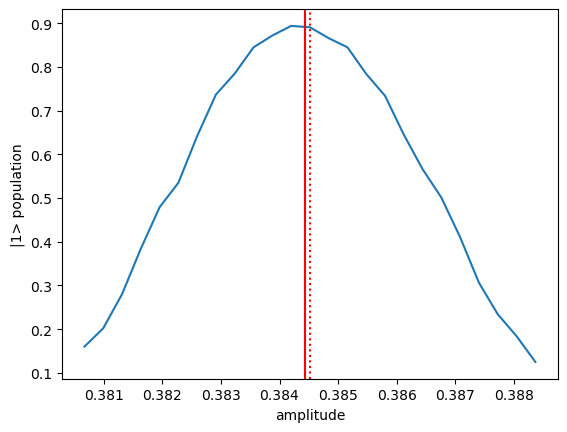

INFO:chipcalibration.graph:starting calibration step Q3_stack_3
INFO:chipcalibration.repeated_xgates:finished Q3 repeatgate. results: {'opt_amplitude': 0.1726852206564645, 'quadratic_fit_params': array([-233136.40070323,   80518.42159698,   -6951.38344187]), 'fit_cov': array([[ 5.80150412e+07, -2.00261757e+07,  1.72814335e+06],
       [-2.00261757e+07,  6.91287272e+06, -5.96545295e+05],
       [ 1.72814335e+06, -5.96545295e+05,  5.14791552e+04]])}


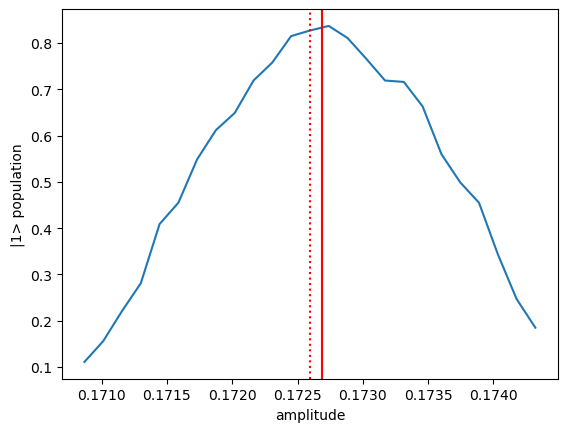

In [138]:
cal_graph.run_calibration(job_manager, qchip, show_plots=True)

In [140]:
qchip.save('../submodules/qchip/X4Y2/qubitcfg.json')